# Leave-one-MOA-out analysis

In [1]:
from utils import LOMODataLoader, LOMOPlotter

In [2]:
loader = LOMODataLoader()
loader.load_files()

In [3]:
plotter = LOMOPlotter(loader)

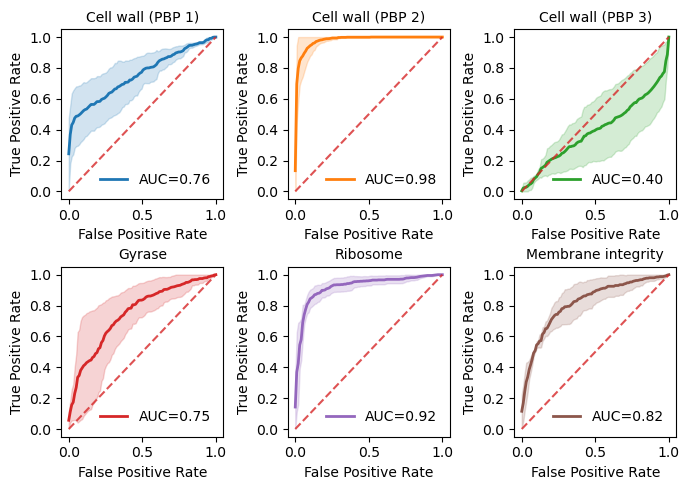

In [4]:
plotter.plot_roc_curves()

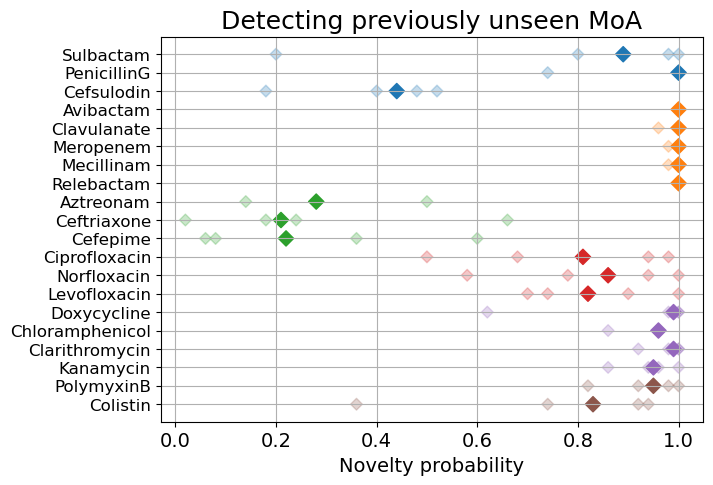

In [5]:
plotter.plot_novelty_score()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


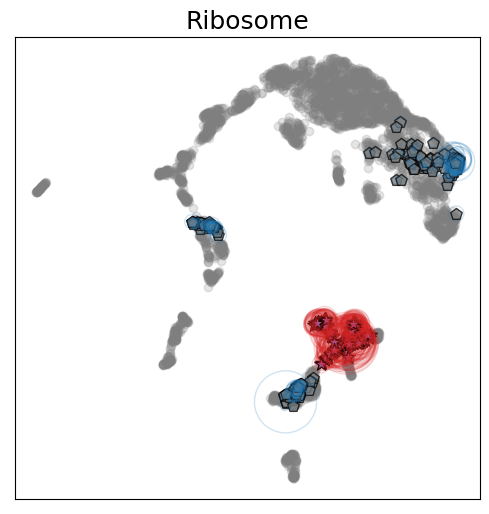

In [6]:
plotter.plot_umap(selected_moa='Ribosome')

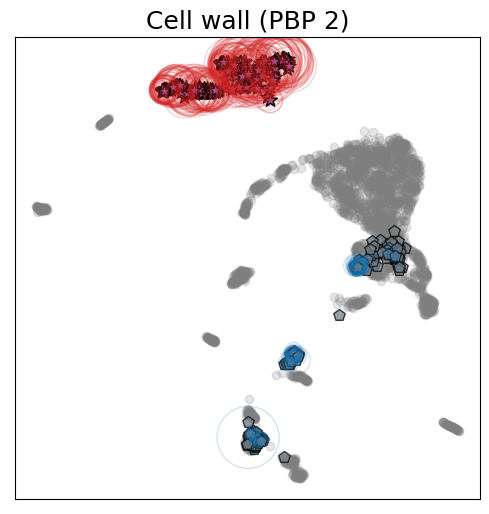

In [7]:
plotter.plot_umap(selected_moa='Cell wall (PBP 2)')

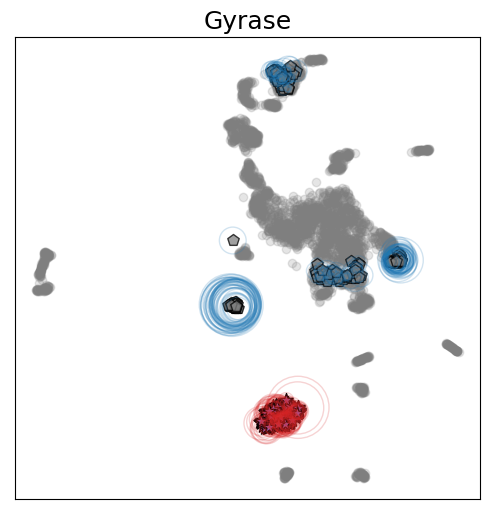

In [8]:
plotter.plot_umap(selected_moa='Gyrase')